# **TASK 1 - Prediction using Supervised ML**

To Predict the percentage of marks of the students based on the number of hours they studied

* change `TODO` with your code

### importing the required libraries

In [1]:
import numpy as np
from sklearn.metrics import mean_absolute_error

### Reading the Data 

In [2]:
import pandas as pd
data = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
# Now we want see shape of this data
# TODO
print(data.shape)

(25, 2)


In [4]:
# Now we want see first 5 rows of this data
# TODO
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Check if there any null value in the Dataset
# TODO
data.isna().sum()

Hours     0
Scores    0
dtype: int64

### As we see above data is cleaned

#### visualize our Data.

In [6]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

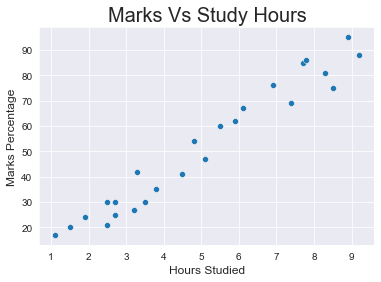

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('darkgrid')
# x ==> write which column we want to use it as indepented varible
# y ==> write which column we want to use it as dependent variable
# TODO 
sns.scatterplot(x= data['Hours'], y= data['Scores'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

#### From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

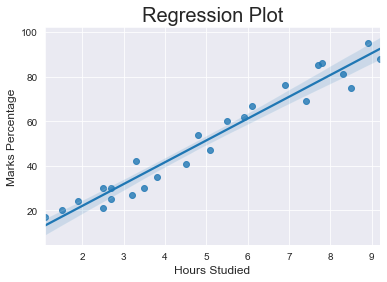

In [23]:
# x ==> write which column we want to use it as indepented varible
# y ==> write which column we want to use it as dependent variable
# TODO 
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

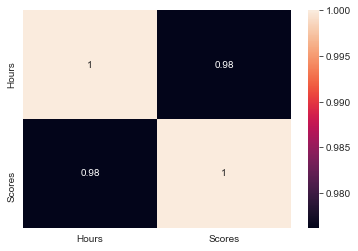

In [24]:
sns.heatmap(data.corr(),annot=True);

### It is confirmed that the variables are positively correlated.

## Training the Model
### 1) Splitting the Data

In [38]:
from sklearn.model_selection import train_test_split

# x ==> write which column we want to use it as indepented varible
# y ==> write which column we want to use it as dependent variable
# TODO 

X= data.iloc[:,:-1].values
y= data.iloc[:,1].values

# Spliting the Data
# write what we should write here
# TODO
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

### 2) Fitting the Data into the model

In [39]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression() # initialize the model
# fiting model with training data
# TODO
regression.fit(X_train,y_train)
print("---------Model Trained---------")

---------Model Trained---------


## Predicting the Percentage of Marks

In [40]:
# predict test data
# TODO
y_pred = regression.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in y_pred]})
prediction

,Hours,Predicted Marks
0,8.3,83.107332
1,2.5,26.765598
2,2.5,26.765598
3,6.9,69.507603
4,5.9,59.793511
5,2.7,28.708416
6,3.3,34.536871


## Comparing the Predicted Marks with the Actual Marks

In [41]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})
compare_scores

,Actual Marks,Predicted Marks
0,81,83.107332
1,30,26.765598
2,21,26.765598
3,76,69.507603
4,62,59.793511
5,25,28.708416
6,42,34.536871


## Visually Comparing the Predicted Marks with the Actual Marks

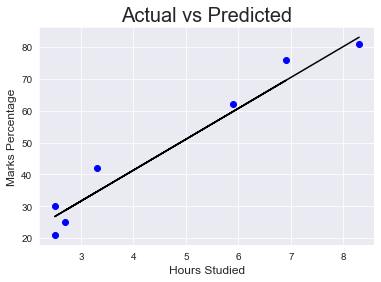

In [42]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Evaluating the Model

In [43]:
# Calculating the accuracy of the model
# TODO
print('Mean absolute error: ',mean_absolute_error(y_test, y_pred))

Mean absolute error:  4.425394675156183


In [52]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.425394675156183
MSE: 23.516396034595225
Root Mean Squared Error: 4.8493706843873285


#### Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [44]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 92.336


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**

In [46]:
# Build another regression model you want and see which better regression model or model wii you build
# Choose any model you want
# Write you code here
# TODO
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2 score: "+str(r2))

R2 score: 0.9553509219739938
